In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline
import os

In [3]:
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']

rois=['IFGorb','IFG','MFG','SFG','AntTemp','PostTemp']
roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 
def get_result_dataset(dataset,rep_name):
    results=[]
    for story in dataset:
        results_story=[]
        if story=='black':
            subs=black_subs
        if story=='slumlordreach':
            subs=slumlordreach_subs
        result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding-"+story+"_"+rep_name+"/"
        roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI.npy')
        for sub in subs:
            results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
            results_sub=np.zeros((12,))
            for roi in range(12):
                results_sub[roi]=results_sub_parcels[np.where(roi_mapping==roi+1)].mean() 
            results_story.append(results_sub)
        results_story=np.asarray(results_story)
        results.append(results_story)
    results=np.asarray(results)
    return np.concatenate(results,axis=0)
            

def bootstrap_errors(data):
    mean=data.mean()
    sampling=[]
    for _ in range(10000):
        sampling.append(np.mean(np.random.choice(data,size=len(data),replace=True)))
    sampling=np.asarray(sampling)
    ci=np.percentile(sampling,[2.5,97.5])
    return np.abs(ci-mean)

def barplot(dataset,rep_name):
    results=get_result_dataset(dataset,rep_name)
    errors=np.asarray([bootstrap_errors(results[:,i]) for i in range(results.shape[1])])
    #plt.figure(dpi=300)
    plt.bar(list(range(12)),results.mean(axis=0),yerr=errors.T)
    plt.xticks(list(range(12)),roi_names,rotation=45)
    if len(dataset)==2:
        story_name='Combined Storys'
    else:
        story_name=dataset[0]
    plt.title(rep_name+" / "+story_name)
    plt.ylabel("Pearson's R")
    plt.ylim(-0.02,0.08)


bert-base-uncased_semantic_composition_20-TRs
bert-base-uncased_semantic_composition_0-TRs
bert-base-uncased_syntactic_complexity_L-inf_T-20_D-concat
bert-base-uncased_semantic_composition_1-TRs
bert-base-uncased_syntactic_complexity_L-1_T-128_D-concat
bert-base-uncased_syntactic_distance_T-128_D-bck
bert-base-uncased_syntactic_complexity_L-inf_T-10_D-bck
bert-base-uncased_syntactic_complexity_L-inf_T-10_D-concat
bert-base-uncased_semantic_composition_5-TRs
bert-base-uncased_syntactic_complexity_L-1_T-20_D-fwd
bert-base-uncased_syntactic_distance_T-10_D-fwd
bert-base-uncased_syntactic_complexity_L-inf_T-20_D-bck
bert-base-uncased_syntactic_complexity_L-1_T-128_D-fwd
bert-base-uncased_syntactic_complexity_L-1_T-10_D-concat
bert-base-uncased_semantic_composition_2-TRs
bert-base-uncased_semantic_composition_10-TRs
bert-base-uncased_syntactic_distance_T-128_D-concat
bert-base-uncased_syntactic_complexity_L-1_T-10_D-fwd
bert-base-uncased_syntactic_complexity_L-1_T-128_D-bck
bert-base-uncase

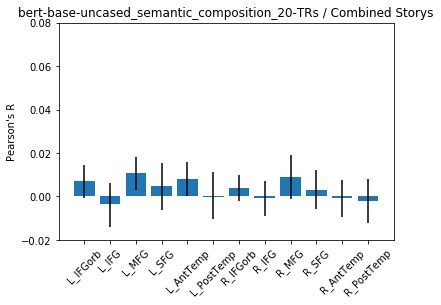

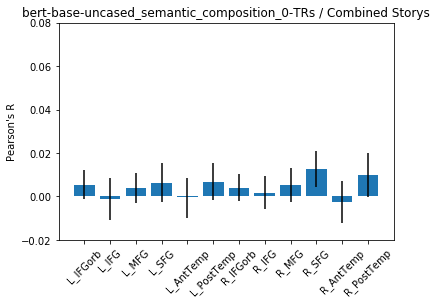

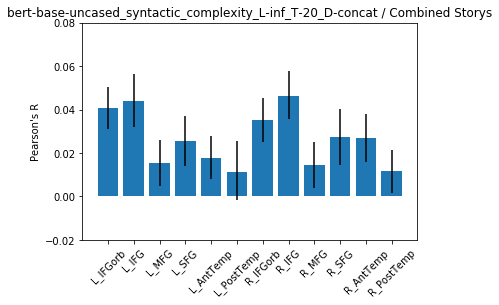

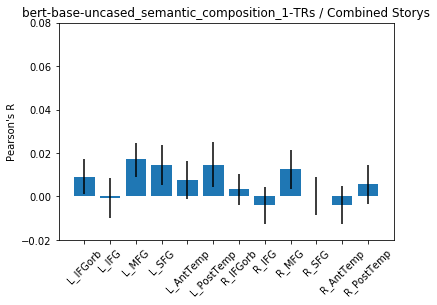

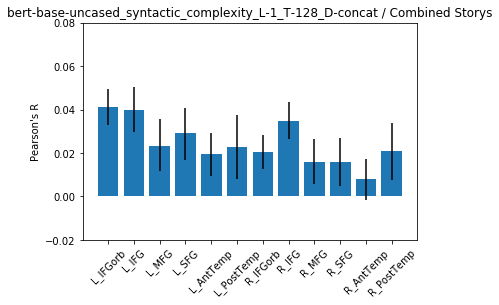

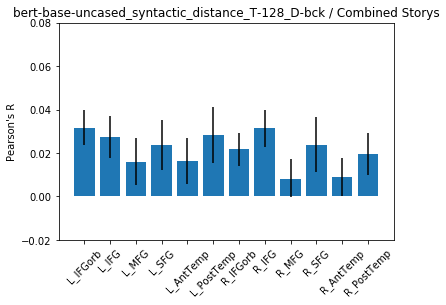

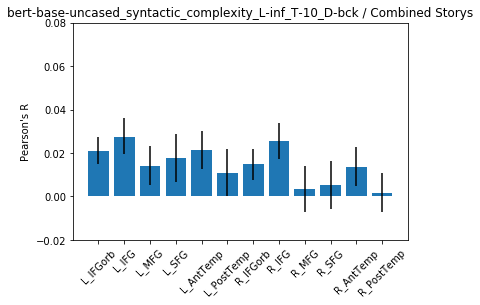

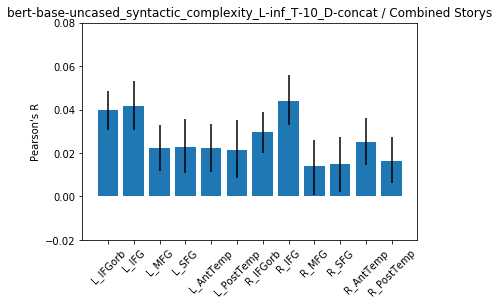

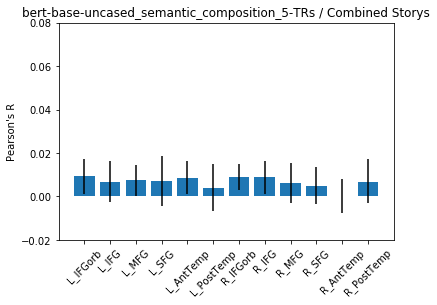

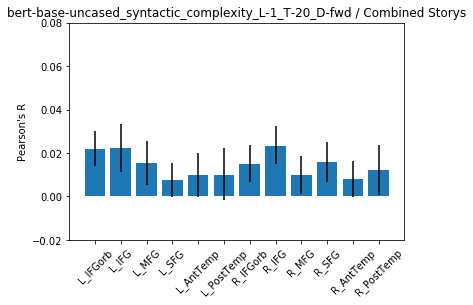

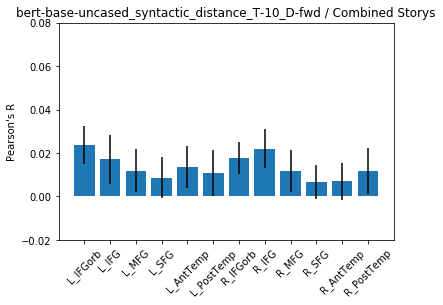

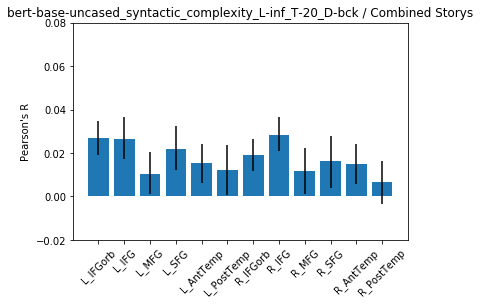

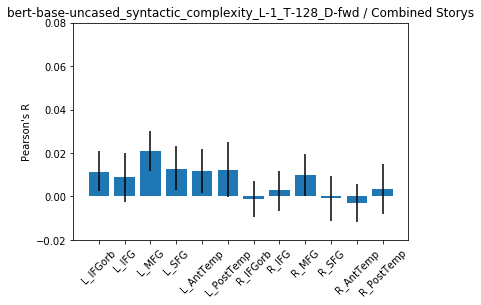

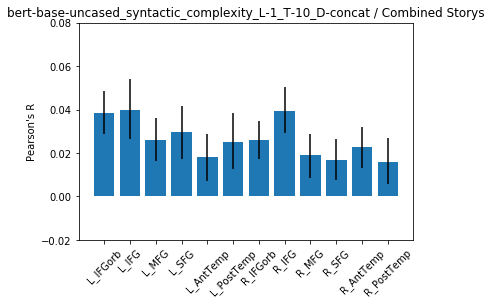

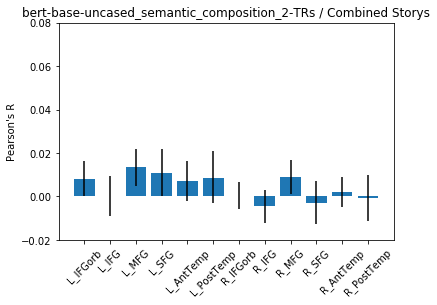

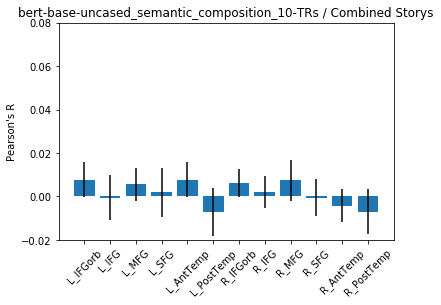

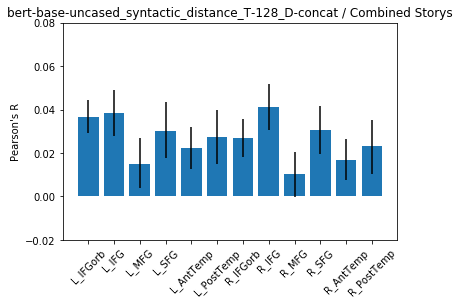

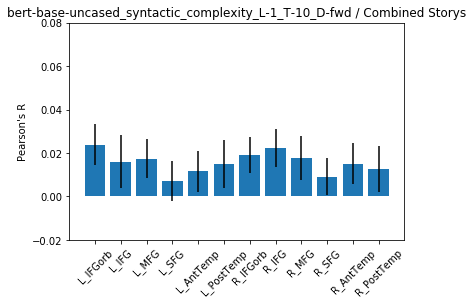

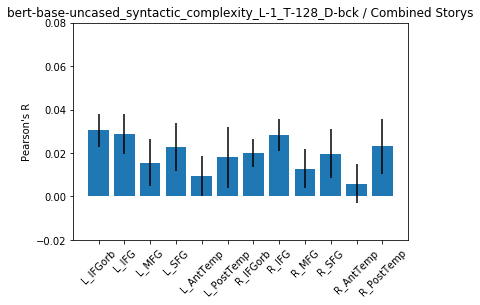

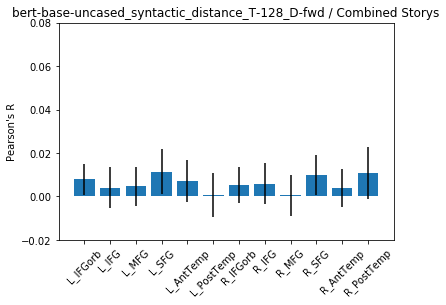

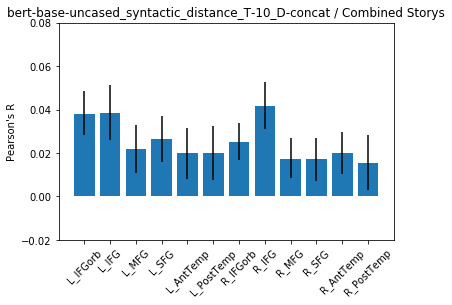

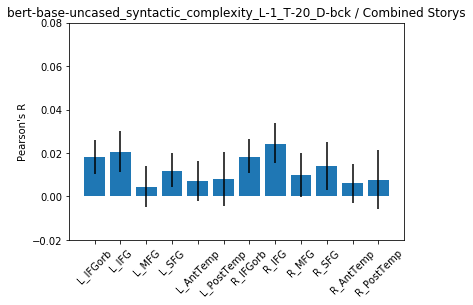

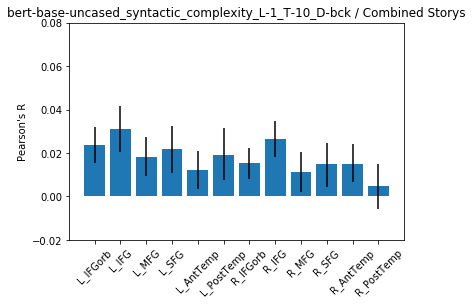

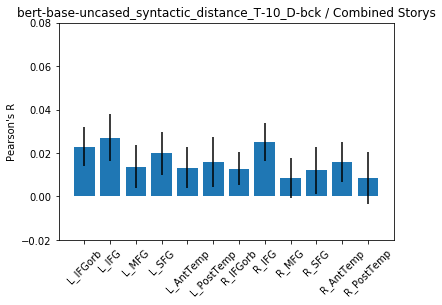

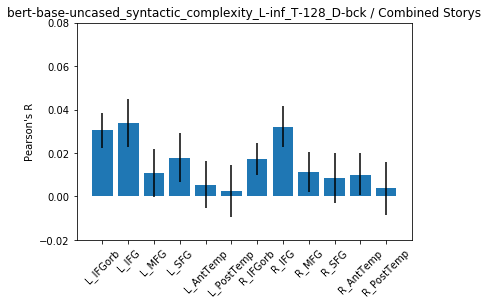

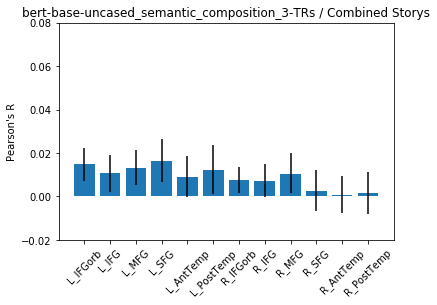

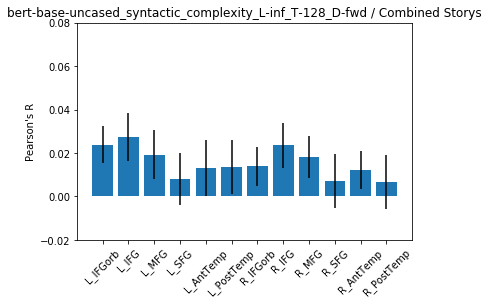

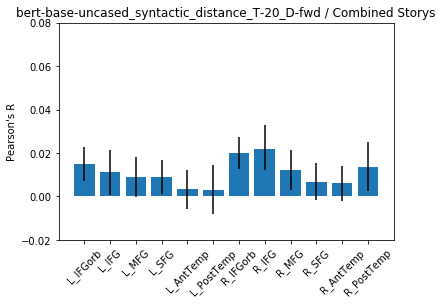

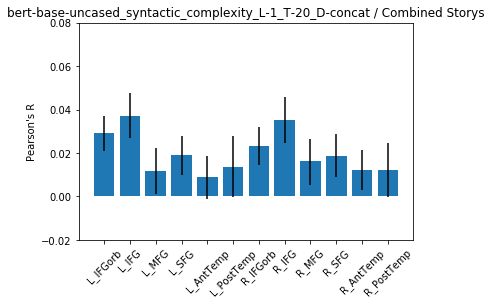

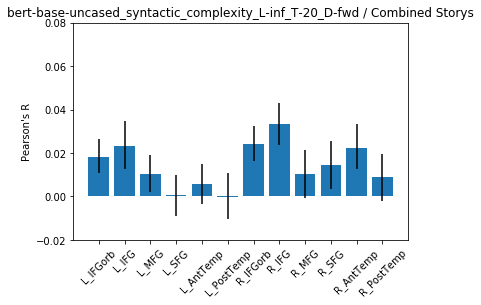

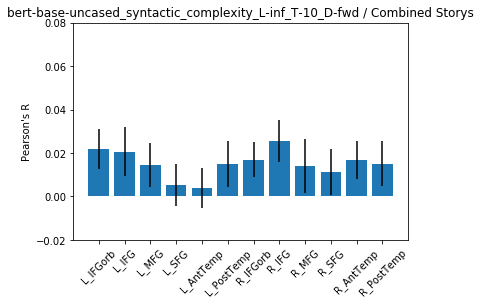

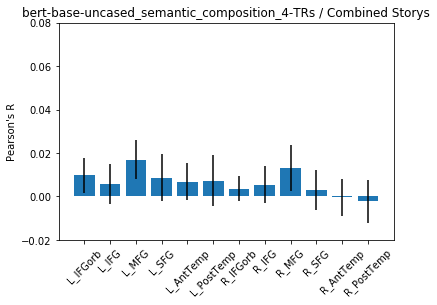

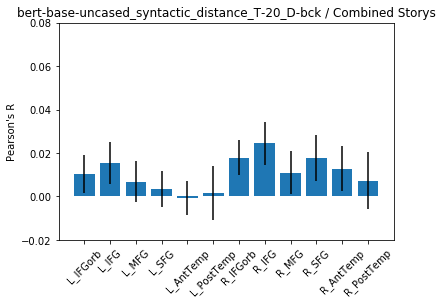

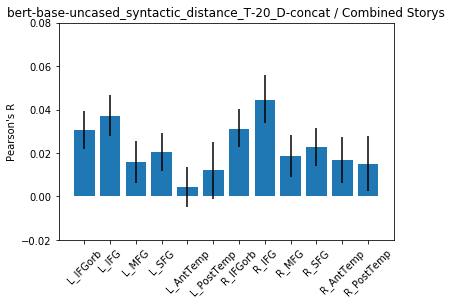

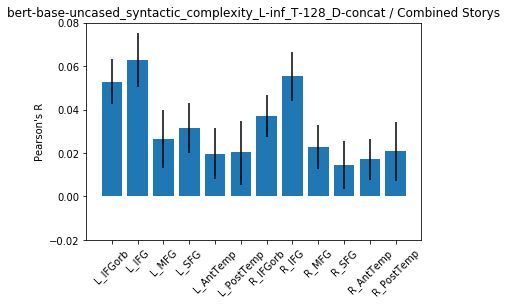

In [4]:
fnames=os.listdir('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/syntactic_analyses/')
dataset=['black','slumlordreach']
reps=[rep[6:-4] for rep in fnames]
for rep in reps:
    if 'semantic_composition_120-TRs' not in rep:
        print(rep)
        plt.figure()
        barplot(dataset,rep) 